In [115]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind'])

import seaborn as sns
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [116]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16646887918586461533
xla_global_id: -1
]


# Import MNIST dataset for handwritten numbers

- Training set contains 60.000 numbers
- Test set contains 10.000 numbers

In [117]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

# Split Training set in training and validation data

- validation data is 20% of total set (12.000 samples)

In [118]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.80)

# Plot first 4 digits of Trainingdata

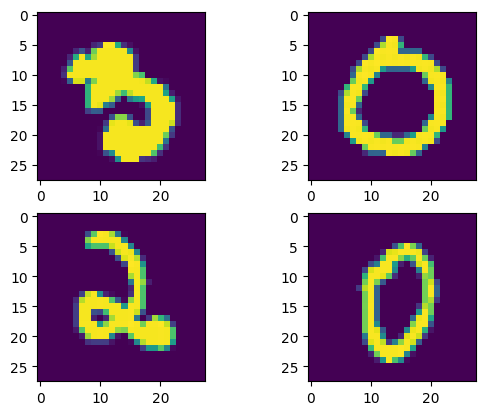

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 2)

ax1[0].imshow(X_train[0])
ax1[1].imshow(X_train[1])

ax2[0].imshow(X_train[2])
ax2[1].imshow(X_train[3])

plt.show()

# Defining the model

Input shape is the pixel density of the pictures (28x28)

In [120]:
model = keras.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation= 'sigmoid')
])

In [121]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [122]:
history = model.fit(
    X_train,
    y_train, 
    epochs=200,
    batch_size=1000,
    validation_data = (X_valid, y_valid),
    callbacks=[early_stopping])

Epoch 1/200
48/48 [==============================] - 7s 82ms/step - loss: 0.5001 - accuracy: 0.8469 - val_loss: 0.2541 - val_accuracy: 0.9301
Epoch 2/200
48/48 [==============================] - 3s 73ms/step - loss: 0.2008 - accuracy: 0.9392 - val_loss: 0.1745 - val_accuracy: 0.9491
Epoch 3/200
48/48 [==============================] - 4s 74ms/step - loss: 0.1444 - accuracy: 0.9556 - val_loss: 0.1284 - val_accuracy: 0.9628
Epoch 4/200
48/48 [==============================] - 3s 73ms/step - loss: 0.1079 - accuracy: 0.9671 - val_loss: 0.1115 - val_accuracy: 0.9686
Epoch 5/200
48/48 [==============================] - 4s 76ms/step - loss: 0.0852 - accuracy: 0.9730 - val_loss: 0.1098 - val_accuracy: 0.9680
Epoch 6/200
48/48 [==============================] - 4s 79ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0994 - val_accuracy: 0.9725
Epoch 7/200
48/48 [==============================] - 4s 79ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0993 - val_accuracy: 0.9732
Epoch 

In [123]:
history_pd = pd.DataFrame(history.history)

<Axes: >

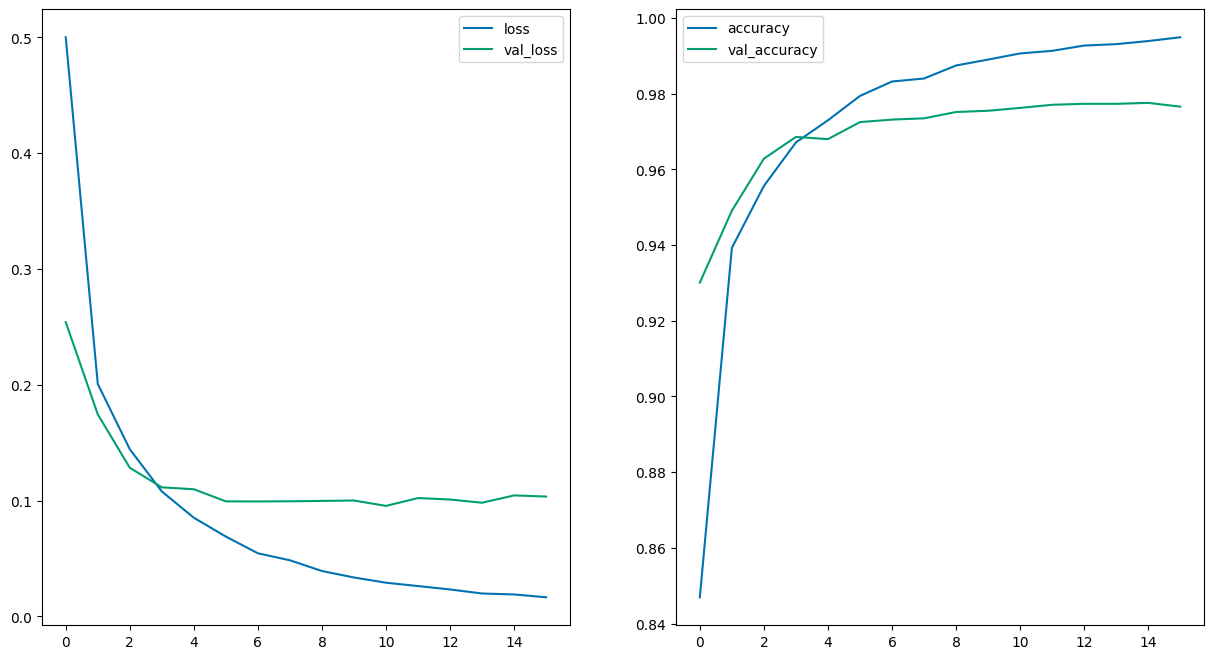

In [138]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
history_pd.loc[:, ['loss', 'val_loss']].plot(ax = ax[0])
history_pd.loc[:,['accuracy', 'val_accuracy']].plot(ax=ax[1])

In [125]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 4ms/step


In [126]:
y_pred[1]

2

In [127]:
y_test[1]

2

<Axes: >

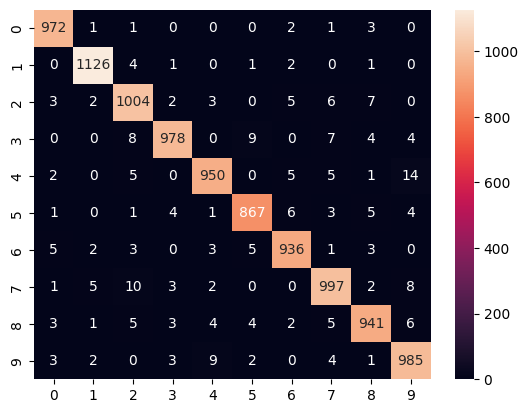

In [128]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')

In [141]:
from sklearn.metrics import f1_score

In [166]:
f1_1 = f1_score(y_test, y_pred, average=None)

In [167]:
f1_1.mean()

0.9754297243099851

In [168]:
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

In [169]:
f1_macro, f1_micro

(0.9754297243099851, 0.9756)

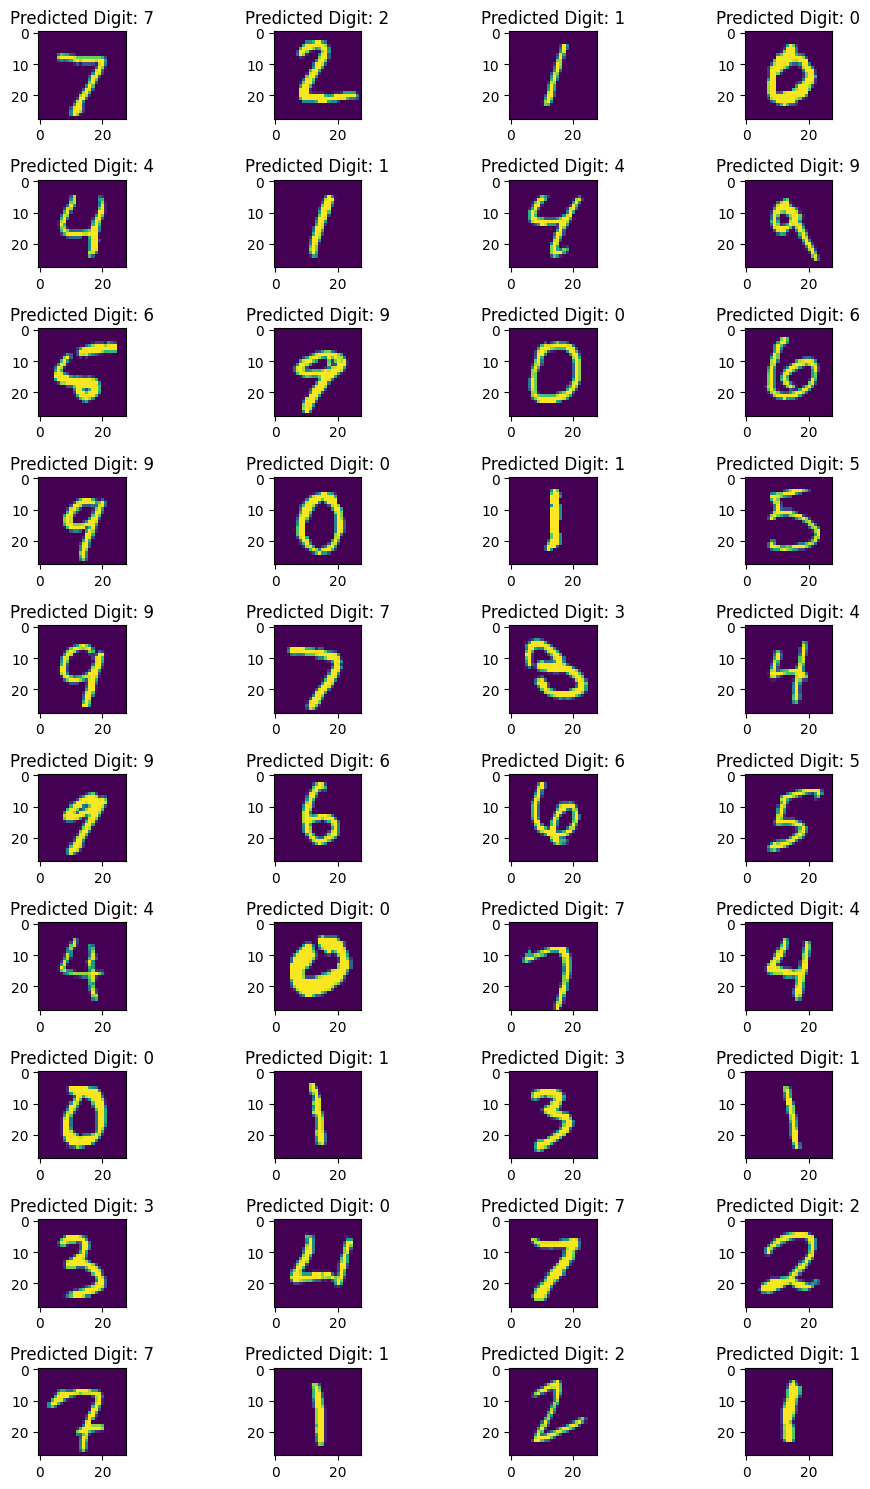

In [133]:
fig, ax = plt.subplots(10, 4, figsize=(10,15))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Predicted Digit: {y_pred[i]}')
fig.tight_layout()
plt.show()